# Images as Functions

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

1.a: The input images are defined as below.


The first image ./ps0-1-a-1.tiff has shape (512, 512, 3) and its order is RGB.


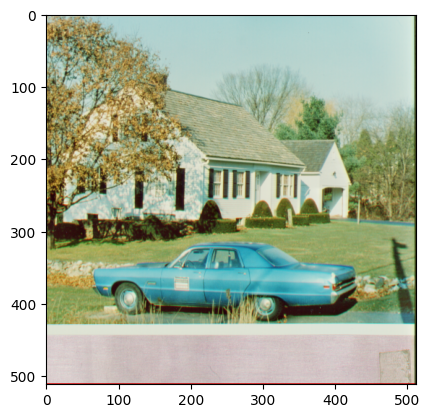

The second image ./ps0-1-a-2.tiff has shape (512, 512, 3) and its order is RGB.


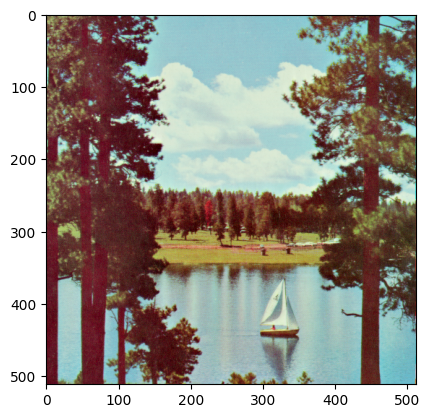

In [2]:
img1_path = "./ps0-1-a-1.tiff"
img2_path = "./ps0-1-a-2.tiff"

with Image.open(img1_path) as pil_im1:
    arr1 = np.asarray(pil_im1)
    print(f"The first image {img1_path} has shape {arr1.shape} and its order is {pil_im1.mode}.") # HxWx3, RGB
    plt.imshow(arr1)
    plt.show()

with Image.open(img2_path) as pil_im2:
    arr2 = np.asarray(pil_im2)
    print(f"The second image {img2_path} has shape {arr2.shape} and its order is {pil_im2.mode}.") # HxWx3, RGB
    plt.imshow(arr2)
    plt.show()


2.a: Swap the red and blue channels of image 1.

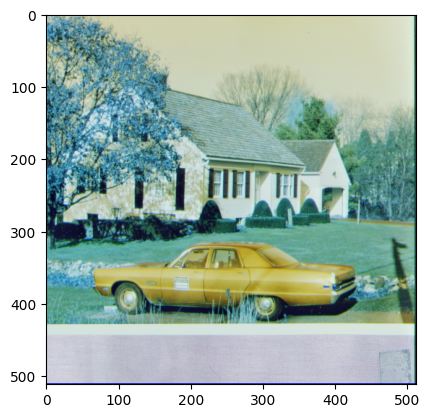

In [3]:
with Image.open(img1_path) as im:
    arr = np.asarray(im)
# Swap the red and blue channel.
plt.imshow(arr[:, :, ::-1])
plt.show()

2.b: Create a monochrome image (`M1g`) by selecting the green channel of image 1

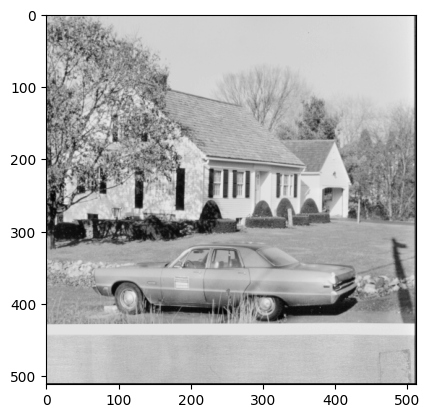

In [4]:
with Image.open(img1_path) as im:
    arr = np.asarray(im)
# Select the green channel
plt.imshow(arr[:, :, 1], cmap='gray', vmin=0, vmax=255)
plt.show()

2.c: Create a monochrome image (`M1r`) by selecting the red channel of image 1

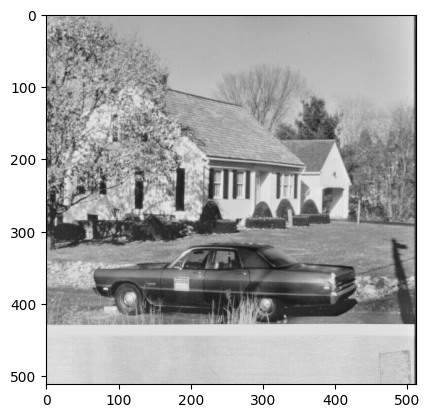

In [5]:
with Image.open(img1_path) as im:
    arr = np.asarray(im)
# Select the green channel
plt.imshow(arr[:, :, 0], cmap='gray', vmin=0, vmax=255)
plt.show()

2.d **Which looks more like what you’d expect a monochrome image to look like? Would you expect a computer vision algorithm to work on one better than the other?**  
The monochrome image from the green channel visually appears superior to the one from the red channel. However, I think that computer vision algorithms generally perform better on the red monochrome image. The pixels' values in the red image are brighter, indicating more information is captured, while the green image's darker pixel values suggest light absorption by objects.

3.a Take the inner square of 50x100 pixels (that’s 50 rows by 100 columns – a horizontal image) of monochrome version of image 1 and insert them into the monochrome version of image 2.

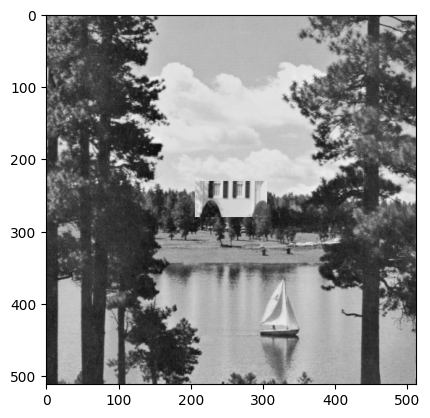

In [6]:
with Image.open(img1_path) as pil_im1:
    arr1 = np.asarray(pil_im1.convert('L')) # RGB -> GRAY
    h1, w1 = arr1.shape
    center1 = (int(h1/2), (w1/2)) # y, x

with Image.open(img2_path) as pil_im2:
    arr2 = np.asarray(pil_im2.convert('L')) # RGB -> GRAY
    h2, w2 = arr2.shape
    center2 = (int(h2/2), (w2/2)) # y, x
    # arr2 is an immutable array. If written, the error below is shown:
    # ValueError: assignment destination is read-only
    output = np.zeros_like(arr2)
    output[:, :] = arr2[:, :]

target_width = 100
target_height = 50

arr1_start_y = int(center1[0]-target_height/2)
arr1_end_y = int(center1[0]+target_height/2)
arr1_start_x = int(center1[1]-target_width/2)
arr1_end_x = int(center1[1]+target_width/2)

arr2_start_y = int(center2[0]-target_height/2)
arr2_end_y = int(center2[0]+target_height/2)
arr2_start_x = int(center2[1]-target_width/2)
arr2_end_x = int(center2[1]+target_width/2)


output[arr2_start_y:arr2_end_y, arr2_start_x:arr2_end_x] = arr1[arr1_start_y:arr1_end_y, arr1_start_x:arr1_end_x]

plt.imshow(output, cmap='gray', vmin=0, vmax=255)
plt.show()

4.a: What is the min and max of the pixel values of `M1g`? What is the mean? What is the standard deviation? And how did you compute these?

In [7]:
with Image.open(img1_path) as im:
    arr = np.asarray(im)
    green = arr[:, :, 1]
    minimum = np.min(green)
    maximum = np.max(green)
    mean = np.mean(green)
    std = np.std(green)
    print(f"Characteristic of M1g: \nMin: {minimum}. Max: {maximum}. Mean: {mean}. Std: {std}.")


Characteristic of M1g: 
Min: 0. Max: 242. Mean: 168.22595977783203. Std: 48.71971251758858.


4.b: Subtract the mean from all the pixels, then divide by the standard deviation, then multiply by 10 (if your image is zero to 255) or by 0.05 (if your image ranges from 0.0 to 1.0). Now add the mean back in.

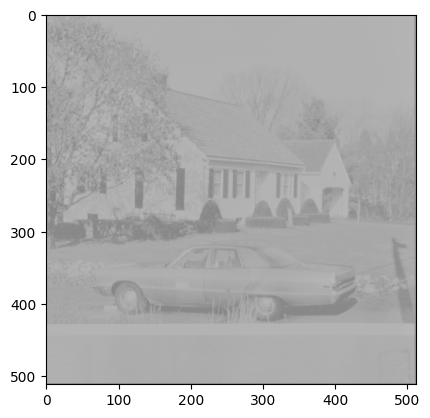

In [8]:
with Image.open(img1_path) as im:
    arr = np.asarray(im)
    green = arr[:, :, 1]
    minimum = np.min(green)
    maximum = np.max(green)
    mean = np.mean(green)
    std = np.std(green)

    output = (mean+10*(green-mean)/std)
    output = output.astype(np.uint8)

plt.imshow(output, cmap='gray', vmin=0, vmax=255)
plt.show()

4.c: Shift `M1g` to the left by 2 pixels.

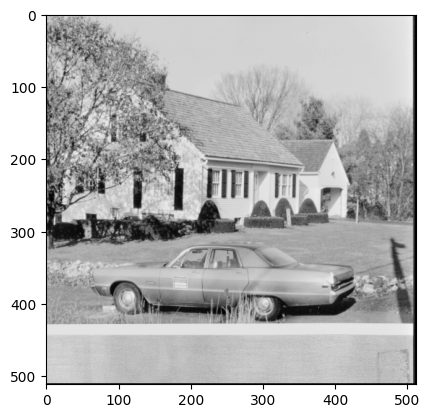

In [9]:
shift_pixel = 2
with Image.open(img1_path) as im:
    arr = np.asarray(im)
    green = arr[:, :, 1]
    shifted_green = np.zeros_like(green)
    shifted_green[:, :-shift_pixel] = green[:, shift_pixel:]

plt.imshow(shifted_green, cmap='gray', vmin=0, vmax=255)
plt.show()

4.d: Subtract the shifted version of `M1g` from the original and make sure that the values are legal (what do negative numbers for pixels mean anyway?).

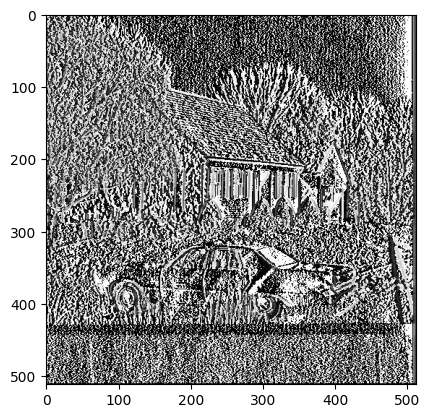

In [10]:
shift_pixel = 2
with Image.open(img1_path) as im:
    arr = np.asarray(im)
    green = arr[:, :, 1]
    shifted_green = np.zeros_like(green)
    shifted_green[:, :-shift_pixel] = green[:, shift_pixel:]

sub_shift_green = green-shifted_green
sub_shift_green[sub_shift_green<0] = 0

plt.imshow(sub_shift_green, cmap='gray', vmin=0, vmax=255)
plt.show()

5.a: Take the original colored image and start adding Gaussian noise to the pixels in the green channel. Increase sigma until the noise is somewhat visible.

<class 'numpy.ndarray'> float64 <class 'numpy.ndarray'> float64


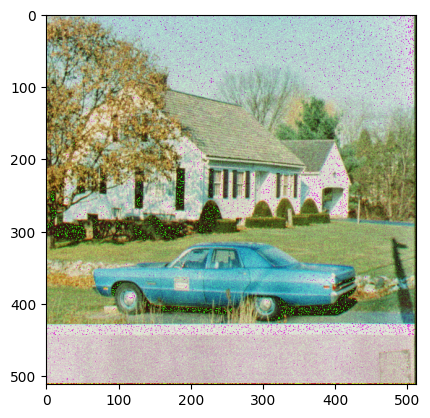

In [11]:
def gen_2d_gauss_noise(mean, std, height, width):
    return np.random.normal(mean, std, size=(height, width))

with Image.open(img1_path) as im:
    arr = np.asarray(im) # HxWx3
    height, width, _ = arr.shape
    output = np.zeros_like(arr)
    output[:] = arr
    output = output.astype(np.float64)

    noise = gen_2d_gauss_noise(0, 20, height, width)
    print(type(noise), noise.dtype, type(output), output.dtype)

    output[:, :, 1] += noise # Add to green channel

plt.imshow(output.astype(np.uint8))
plt.show()

5.b: Now, instead add that amount of noise to the blue channel.

<class 'numpy.ndarray'> float64 <class 'numpy.ndarray'> float64


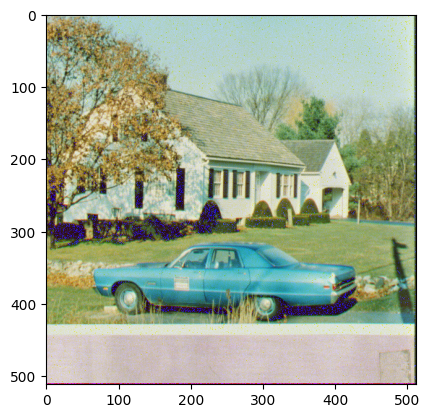

In [12]:
def gen_2d_gauss_noise(mean, std, height, width):
    return np.random.normal(mean, std, size=(height, width))

with Image.open(img1_path) as im:
    arr = np.asarray(im) # HxWx3
    height, width, _ = arr.shape
    output = np.zeros_like(arr)
    output[:] = arr
    output = output.astype(np.float64)

    noise = gen_2d_gauss_noise(0, 20, height, width)
    print(type(noise), noise.dtype, type(output), output.dtype)

    output[:, :, 2] += noise # Add to blue channel

plt.imshow(output.astype(np.uint8))
plt.show()

5.c: Which looks better? Why?